**Name: Vivian Lim Bi Fang**

**ID: P101458**

# Data Retrieval

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
print(train.shape)

(8523, 12)


In [9]:
print(test.shape)

(5681, 11)


In [10]:
data = pd.concat([train,test],axis=0,ignore_index=True)
data.shape

(14204, 12)

# Data Exploratory & Data Visualization

In [11]:
train.select_dtypes(include=[np.number]).dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [12]:
# check on numeric variables
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# Numeric data
corr = train.corr()
corr['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Correlation between Numeric variables')

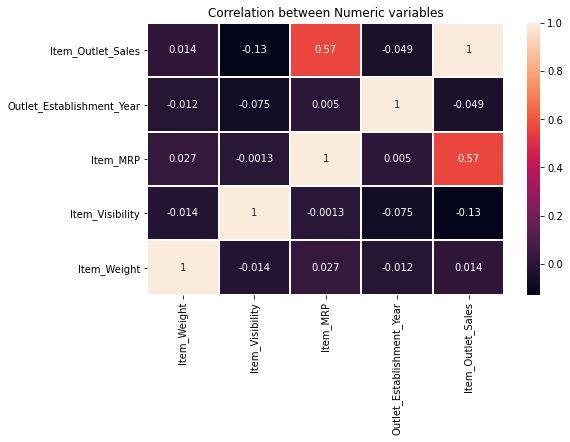

In [14]:
plt.figure(figsize = (8,5))
ax = sns.heatmap(corr, annot=True, linewidth = 1, linecolor= 'white')

ax.set_ylim(0,5)
plt.title('Correlation between Numeric variables')

- Item MRP has the highest correlation to the item sale price followed by item weight
- Surprisingly the item visibility showed that items with lower visibility have higher item sales.
- Outlet Establishment year must converted to operation duration to see the impact.

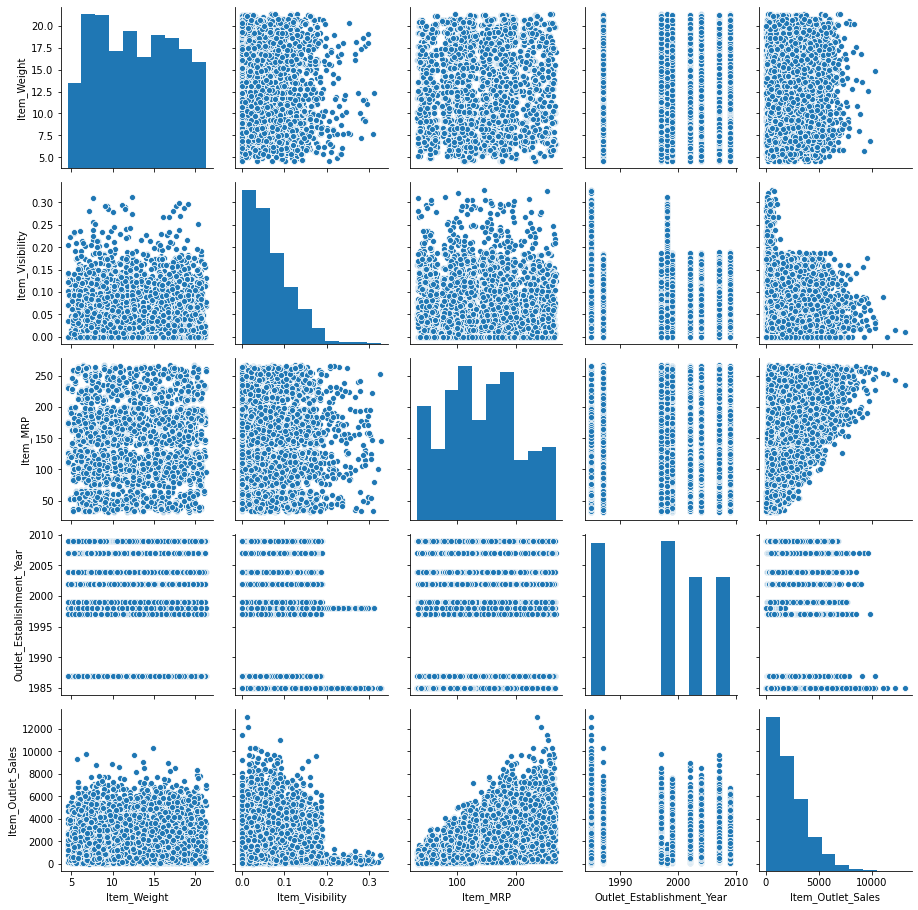

In [15]:
sns.pairplot(train)

Text(0.5, 1.0, 'Item_Visibility VS Item_Outlet_Sales')

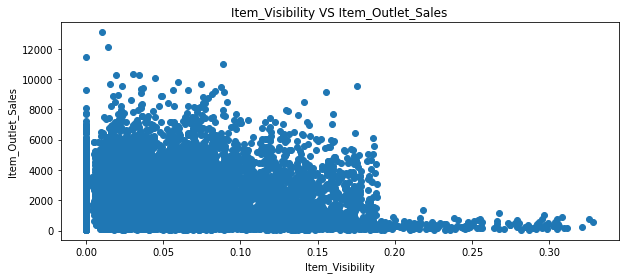

In [16]:
plt.figure(figsize=(10,4))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility VS Item_Outlet_Sales')

- the scatter plot above showed that low item visibility has high item sales. These items might be daily used products 
- Besides, zero visibility is not legit thus have to do some data replacement. 

In [17]:
# categorical = data.select_dtypes(include='object').dtypes
categorical = train.select_dtypes(include='object')
categorical

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [18]:
sales_mean_olt = pd.pivot_table(train,values='Item_Outlet_Sales',columns=['Outlet_Location_Type'])
sales_mean_olt

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Outlet_Sales,1876.909159,2323.990559,2279.627651


Text(0.5, 1.0, 'Outlet_Location_Type VS Item_Outlet_Sales')

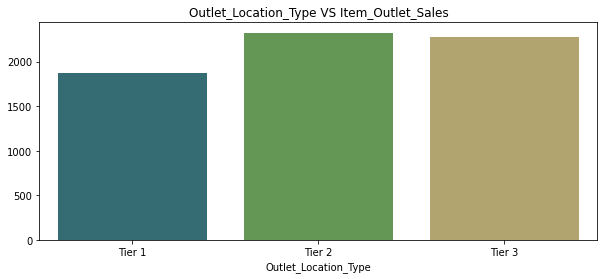

In [19]:
plt.figure(figsize=(10,4))
sns.barplot(x= sales_mean_olt.columns,y= sales_mean_olt.values[0], data= data, palette= 'gist_earth' )
plt.title('Outlet_Location_Type VS Item_Outlet_Sales')

- It seems like tier 1 has lower item sales compared to tier2&3

In [20]:
sales_mean_ot = pd.pivot_table(train,values='Item_Outlet_Sales',columns=['Outlet_Type'])
sales_mean_ot

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


Text(0.5, 1.0, 'Outlet_Type VS Item_Outlet_Sales')

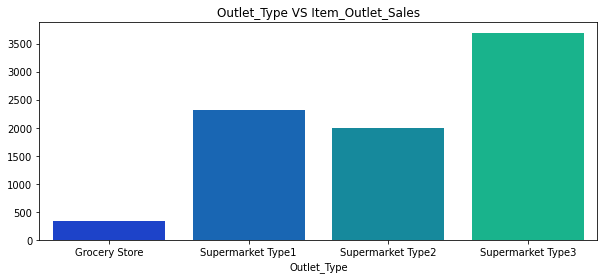

In [21]:
plt.figure(figsize=(10,4))
sns.barplot(x= sales_mean_ot.columns,y= sales_mean_ot.values[0], data= data, palette= 'winter' )
plt.title('Outlet_Type VS Item_Outlet_Sales')

In [22]:
sales_mean_size = pd.pivot_table(train,values='Item_Outlet_Sales',columns=['Outlet_Size'])
sales_mean_size

Outlet_Size,High,Medium,Small
Item_Outlet_Sales,2298.995256,2681.603542,1912.149161


Text(0.5, 1.0, 'Outlet_Size VS Item_Outlet_Sales')

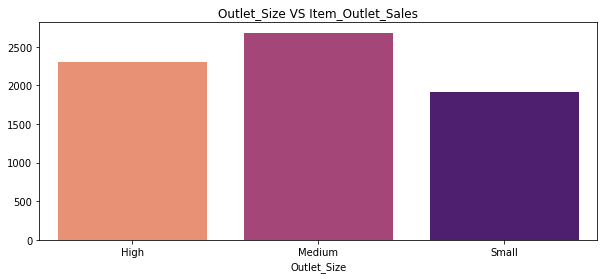

In [23]:
plt.figure(figsize=(10,4))
sns.barplot(x= sales_mean_size.columns,y= sales_mean_size.values[0], data= data, palette= 'magma_r' )
plt.title('Outlet_Size VS Item_Outlet_Sales')

In [24]:
sales_mean_ot_s = train.groupby(['Outlet_Type','Outlet_Size']).mean().unstack()['Item_Outlet_Sales']
sales_mean_ot_s

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,NaN,340.329723
Supermarket Type1,2298.995256,2348.354635,2358.343066
Supermarket Type2,NaN,1995.498739,NaN
Supermarket Type3,NaN,3694.038558,NaN


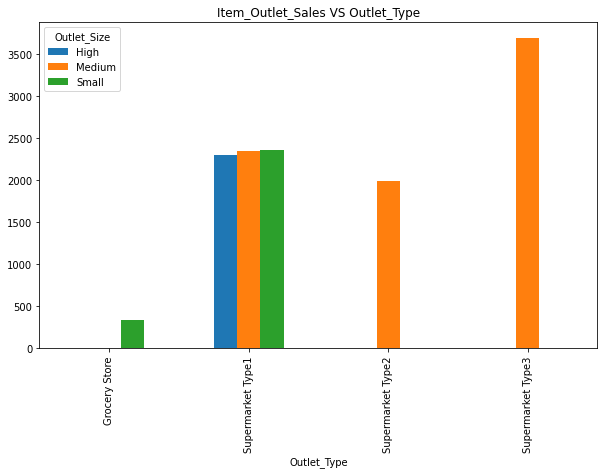

In [25]:
ax = sales_mean_ot_s.plot(kind='bar',figsize=(10,6),title='Item_Outlet_Sales VS Outlet_Type') 

- The figure above tell us that the size of outlet does not impact much on item sales (refer to type1). However the type of supermarket did impact on item sales. The higher the type of supermarket, the higher the item sales.

In [26]:
sales_mean_out_identi = train.groupby(['Outlet_Identifier']).mean()['Item_Outlet_Sales']
sales_mean_out_identi

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

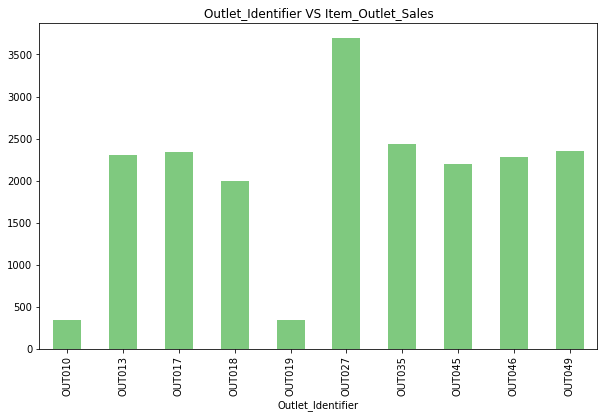

In [27]:
plt.figure(figsize=(10,4))
sales_mean_out_identi.plot(kind='bar',figsize=(10,6),colormap='Accent',title=('Outlet_Identifier VS Item_Outlet_Sales'))

- Outlet 027 has the highest item outlet sales. 
- We can study more on Outlet 027 to get more information for data analysis. 

In [28]:
out_ident_info = pd.pivot_table(train,values='Item_Outlet_Sales',index=['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
out_ident_info

,,,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
OUT013,High,Tier 3,Supermarket Type1,2298.995256
OUT018,Medium,Tier 3,Supermarket Type2,1995.498739
OUT019,Small,Tier 1,Grocery Store,340.329723
OUT027,Medium,Tier 3,Supermarket Type3,3694.038558
OUT035,Small,Tier 2,Supermarket Type1,2438.841866
OUT046,Small,Tier 1,Supermarket Type1,2277.844267
OUT049,Medium,Tier 1,Supermarket Type1,2348.354635


- OUT010,OUT017, OUT045 are missing because groupby method is able to automatic exclusion of “nuisance” columns. In this case missing values.

In [29]:
train[train['Outlet_Identifier']== 'OUT010'][['Outlet_Type','Outlet_Size','Outlet_Location_Type']]

,Outlet_Type,Outlet_Size,Outlet_Location_Type
3,Grocery Store,NaN,Tier 3
28,Grocery Store,NaN,Tier 3
30,Grocery Store,NaN,Tier 3
45,Grocery Store,NaN,Tier 3
65,Grocery Store,NaN,Tier 3
...,...,...,...
8400,Grocery Store,NaN,Tier 3
8432,Grocery Store,NaN,Tier 3
8473,Grocery Store,NaN,Tier 3
8486,Grocery Store,NaN,Tier 3


- it make sense for outlet 027 has  the highest sales as it consists the criterias for high item sales 
- Outlet027 has medium outlet size, tier3 outlet location type and supermarket type3
- However for lower sales outlet 010 and 019 are mainly grocery type outlet with different location types which are tier 3 and tier 1 respectively. 

In [30]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- 'Low Fat', 'LF' and 'low fat' are having the same meaning. So group these 3 classes into one.
- Same to 'Regular' and 'reg'. So fat content feature will change to 2 classes. 'Low Fat' and 'Regular'. 
- However, some items are not eatable. These non-edible items are catgorized as one group (non-edible)

In [31]:
sales_mean_item_type = pd.pivot_table(train,values='Item_Outlet_Sales',columns=['Item_Type'])
sales_mean_item_type

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Outlet_Sales,1952.971207,2204.132226,2111.808651,2225.194904,2232.542597,2132.867744,2289.009592,2139.221622,2010.000265,2258.7843,2158.977911,1926.139702,2326.065928,2277.321739,2006.511735,2374.332773


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

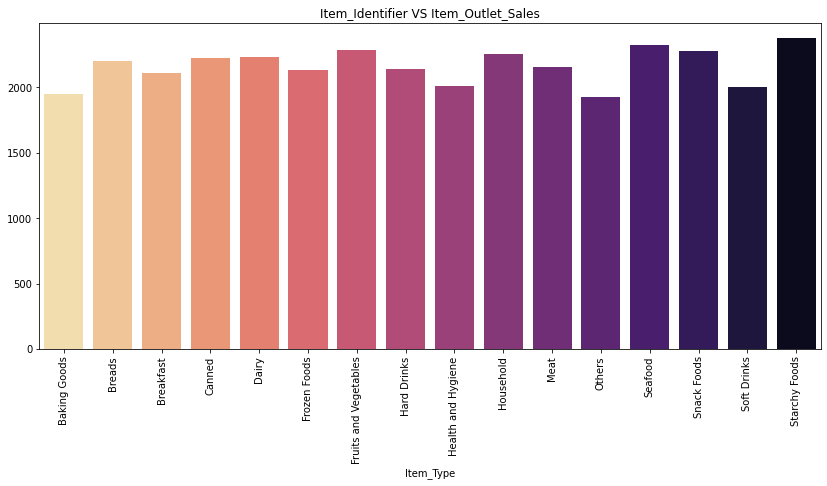

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(x= sales_mean_item_type.columns,y= sales_mean_item_type.values[0], data= data, palette= 'magma_r' )
plt.title('Item_Identifier VS Item_Outlet_Sales')
plt.xticks(rotation=90)

In [33]:
train.groupby(['Item_Identifier','Item_Type']).mean()['Item_Outlet_Sales']

Item_Identifier  Item_Type         
DRA12            Soft Drinks           1843.600200
DRA24            Soft Drinks           2246.218971
DRA59            Soft Drinks           2614.430150
DRB01            Soft Drinks           1518.024000
DRB13            Soft Drinks           2428.838400
                                          ...     
NCZ30            Household             1807.647000
NCZ41            Health and Hygiene    1827.487840
NCZ42            Household             3839.801760
NCZ53            Health and Hygiene    3014.742400
NCZ54            Household             3249.104000
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [34]:
train['Item_Category'] = train['Item_Identifier'].apply(lambda x : x[0:2])
train['Item_Category'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Category, dtype: int64

In [35]:
train.groupby(['Item_Category','Item_Type']).mean()['Item_Outlet_Sales']

Item_Category  Item_Type            
DR             Dairy                    1751.272763
               Hard Drinks              2139.221622
               Soft Drinks              2006.511735
FD             Baking Goods             1952.971207
               Breads                   2204.132226
               Breakfast                2111.808651
               Canned                   2225.194904
               Dairy                    2356.855838
               Frozen Foods             2132.867744
               Fruits and Vegetables    2289.009592
               Meat                     2158.977911
               Seafood                  2326.065928
               Snack Foods              2277.321739
               Starchy Foods            2374.332773
NC             Health and Hygiene       2010.000265
               Household                2258.784300
               Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

- the first 3 characters in item identifier represents item category. eg: DRA = drinks. 
- there are total 3 big categories in this mart sales dataset.
- potential to create a new column call 'Item_Category'

# Data Preprocessing

- Data imputation is done. Train and test set data are editted together for smooth analysis later on. 
- During data exploration, several features are correlated or converted to a new features. Thus in this step, data cleaning is conducted to remove unneccessary features for better accuracy. 
- Besides, inaccurate data on item visibility features is scrutinized. 
- After that, convert the data to dummy data for regression analysis purpose. 
- Then normalize data for better analysis

### Data Cleaning 

In [36]:
data.isnull().sum()/ data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

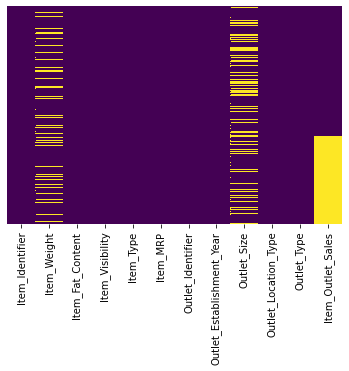

In [37]:
sns.heatmap(data.isnull(),yticklabels= False, cmap= 'viridis',cbar= False)

In [38]:
eda_weight = data.sort_values(by='Item_Identifier', ascending = True)[['Item_Identifier','Item_Weight']]
eda_weight.head(20)
# the weight of items is based on Item_Identifier

,Item_Identifier,Item_Weight
7467,DRA12,11.60
1245,DRA12,11.60
13604,DRA12,11.60
9023,DRA12,11.60
1693,DRA12,11.60
8043,DRA12,11.60
12435,DRA12,NaN
118,DRA12,11.60
1197,DRA12,11.60
8195,DRA24,19.35


In [39]:
# aggfunc default np.mean
avg_weight = pd.pivot_table(data, index='Item_Identifier',values = 'Item_Weight')
avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [40]:
def impute_weight(cols):
    item_ident = cols[0]
    weight = cols[1]
    if pd.isnull(weight):
         return avg_weight['Item_Weight'][avg_weight.index == item_ident]
    else:
        return weight
print ('Before impute: %d' %sum(data['Item_Weight'].isnull()))

data['Item_Weight'] = data[['Item_Identifier','Item_Weight']].apply(impute_weight,axis=1).astype(float)
print ('After impute: %d' %sum(data['Item_Weight'].isnull()))    





Before impute: 2439
After impute: 0


In [41]:
data['Item_Weight']

0         9.30
1         5.92
2        17.50
3        19.20
4         8.93
         ...  
14199    10.50
14200     7.60
14201    10.00
14202    15.30
14203     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [42]:
outlet_view = pd.pivot_table(data,index=['Outlet_Type'],values= 'Outlet_Size', aggfunc = lambda x: x.mode())
outlet_view.head(10)

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [43]:
def impute_outlet_size(cols):
    outlet_type = cols[0]
    outlet_size = cols[1]
    
    if pd.isnull(outlet_size):
        return outlet_view['Outlet_Size'][outlet_view.index == outlet_type][0]
    else:
        return outlet_size

print('Before imputation %d' %sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Type','Outlet_Size']].apply(impute_outlet_size,axis=1)
print('After imputation %d' %sum(data['Outlet_Size'].isnull()))

Before imputation 4016
After imputation 0


In [44]:
# data['Outlet_Size'] = data['Outlet_Size'].str.get(0)
data['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3     Small
4      High
Name: Outlet_Size, dtype: object

In [45]:
visi_view = pd.pivot_table(data,index = 'Item_Identifier', values='Item_Visibility')
visi_view.sort_values(by='Item_Visibility',ascending=True)

,Item_Visibility
Item_Identifier,
DRM59,0.003895
FDU04,0.004780
FDG12,0.004924
FDK51,0.005049
FDW21,0.005306
...,...
NCJ31,0.196480
FDJ56,0.198856
FDR14,0.198975


In [46]:
def replace_visibility(x):
    visibility = x[0]
    item_ident = x[1]
    if visibility == 0:
        return visi_view['Item_Visibility'][visi_view.index == item_ident]
    else:
        return visibility
    
print('before replace: %d' %data[data['Item_Visibility']== 0].shape[0])
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(replace_visibility,axis=1).astype(float)
print('After replace: %d' %data[data['Item_Visibility']== 0].shape[0])
      


before replace: 879
After replace: 0


In [47]:
data['Outlet_Operation_Duration'] = data['Outlet_Establishment_Year'].apply(lambda x : 2013 - x)
data['Outlet_Operation_Duration'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Operation_Duration, dtype: int64

In [0]:
data.drop(['Outlet_Establishment_Year'],axis=1,inplace= True)

Text(0.5, 1.0, 'Correlation between numeric variables')

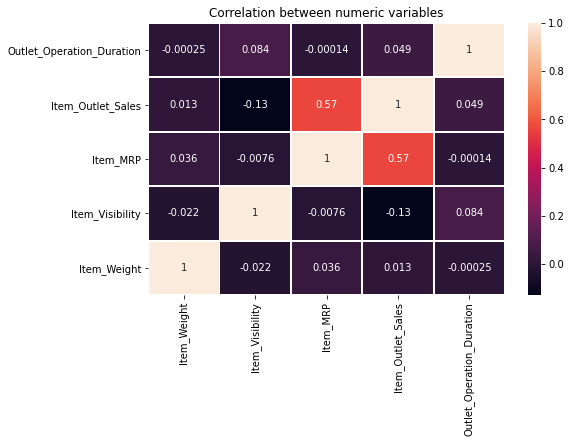

In [49]:
plt.figure(figsize = (8,5))
ax = sns.heatmap(data.corr(), annot=True, linewidth = 1, linecolor= 'white')

ax.set_ylim(0,5)
plt.title('Correlation between numeric variables')

In [50]:
data['Item_Category'] = data['Item_Identifier'].apply(lambda x : x[0:2])
data['Item_Category'] = data['Item_Category'].map({'FD':'Foods','NC': 'Miscellaneous','DR':'Drinks'})
data['Item_Category'].value_counts()

Foods            10201
Miscellaneous     2686
Drinks            1317
Name: Item_Category, dtype: int64

In [51]:
data = data.drop(['Item_Identifier'],axis=1)
data.shape

(14204, 12)

Text(0.5, 1.0, 'Item_Category VS Item_Outlet_Sales')

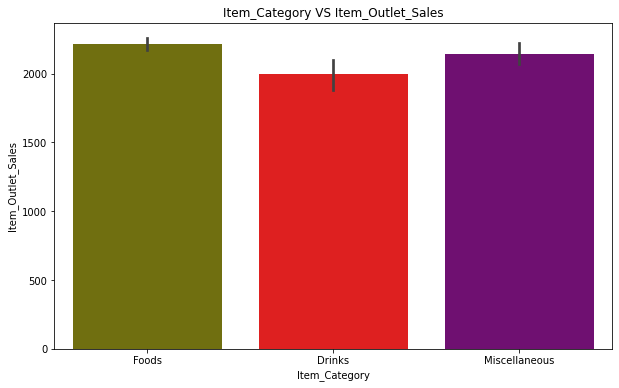

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='Item_Category',y='Item_Outlet_Sales',palette = 'brg_r',data=data)
plt.title('Item_Category VS Item_Outlet_Sales')

- From the bar plot above, drinks has less sales compared to foods and others category. 

In [0]:
replace_fat_content = {'Low Fat':'Low Fat','Regular':'Regular','LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}

In [54]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].map(replace_fat_content)
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [55]:
data.loc[data['Item_Category'] == 'Miscellaneous', 'Item_Fat_Content'] = 'Non_Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64

Text(0.5, 1.0, 'Item_Fat_Content VS Item_Outlet_Sales')

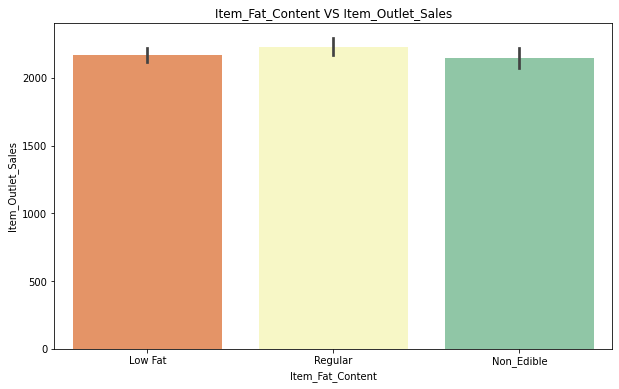

In [56]:
plt.figure(figsize=(10,6))

sns.barplot(x= 'Item_Fat_Content',y= 'Item_Outlet_Sales', data= data, palette= 'Spectral' )
plt.title('Item_Fat_Content VS Item_Outlet_Sales')

In [57]:
data.shape

(14204, 12)

In [0]:
data = data.drop('Item_Type',axis=1)

### One-Hot Encoding

In [59]:
data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Operation_Duration      int64
Item_Category                 object
dtype: object

In [60]:
print ('Before dummy:' '\n''%s' %data.dtypes)
print('\n')
data = pd.get_dummies(data, columns= ['Item_Fat_Content','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Category'])
print ('After dummy:' '\n''%s' %data.dtypes)

Before dummy:
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Operation_Duration      int64
Item_Category                 object
dtype: object


After dummy:
Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Item_Outlet_Sales                float64
Outlet_Operation_Duration          int64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non_Edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifier_OUT019           uint8
Outlet_Identifier

# Train-test split

In [61]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
data['Item_Outlet_Sales']

0         3735.1380
1          443.4228
2         2097.2700
3          732.3800
4          994.7052
5          556.6088
6          343.5528
7         4022.7636
8         1076.5986
9         4710.5350
10        1516.0266
11        2187.1530
12        1589.2646
13        2145.2076
14        1977.4260
15        1547.3192
16        1621.8888
17         718.3982
18        2303.6680
19        2748.4224
20        3775.0860
21        4064.0432
22        1587.2672
23         214.3876
24        4078.0250
25         838.9080
26        1065.2800
27         308.9312
28         178.4344
29         125.8362
30         163.7868
31        2741.7644
32        3068.0064
33        2174.5028
34        2085.2856
35        3791.0652
36        2797.6916
37        1609.9044
38         388.1614
39        2180.4950
40        3435.5280
41        2150.5340
42        2527.3768
43        6768.5228
44         373.5138
45         358.2004
46        2428.8384
47        5815.0972
48        2576.6460
49         780.3176


In [0]:
train = data.iloc[:8523,:]
xtest_no_ylabel = data.iloc[8523:,:].drop(['Item_Outlet_Sales'],axis=1)

In [63]:
print(train.shape)
print(xtest_no_ylabel.shape)

(8523, 31)
(5681, 30)


In [0]:
train.to_csv(r'C:\Users\vivia\Documents\Data Science\TM6112 Research Methodology\Project\final_train.csv', index = False)

In [0]:
xtest_no_ylabel.to_csv(r'C:\Users\vivia\Documents\Data Science\TM6112 Research Methodology\Project\final_test.csv', index = False)

In [0]:
X_train = train.drop(['Item_Outlet_Sales'],axis=1)
y_train = train['Item_Outlet_Sales']

In [0]:
from sklearn.model_selection import train_test_split

In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)

(6818, 30)
(1705, 30)


### Data Scaling 

In [0]:
from sklearn import preprocessing
robtscl_scaler = preprocessing.RobustScaler()
xtrain_robt = robtscl_scaler.fit_transform(xtrain)
xtest_robt = robtscl_scaler.transform(xtest)
xtest_no_ylabel_robt = robtscl_scaler.transform(xtest_no_ylabel)

# XGBoost

In [0]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_validate

In [0]:
def xgBoost_model(X, y):
    gsc = GridSearchCV(
        estimator= XGBRegressor(),
        param_grid={
            'learning_rate': [0.3, 0.2, 0.1, 0.05, 0.01, 0.005],
            'subsample': [0.7, 0.8, 0.9, 1.0],
            'colsample_bynode': [0.7, 0.8, 0.9, 1.0],
            'max_depth': [4, 5, 6, 7, 8, 9],
            'min_child_weight': [5, 6, 7, 8]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(xtrain, ytrain)
    best_params = grid_result.best_params_
    best_XGBoost = XGBRegressor(booster='gbtree', learning_rate=best_params["learning_rate"], subsample=best_params["subsample"], 
                       colsample_bynode=best_params["colsample_bynode"],max_depth=best_params["max_depth"],
                       min_child_weight=best_params["min_child_weight"]
                   )
    print(best_XGBoost)

    scoring = {
               'MAE error': 'neg_mean_absolute_error',
               'RMSE error': 'neg_mean_squared_error'}

    scores = cross_validate(best_XGBoost, xtrain, ytrain, cv=10, scoring=scoring, return_train_score=True)
    

    print ('MAE = {}'.format(-scores['test_MAE error'].mean()))
    print ('RMSE = {}'.format(str(np.sqrt(-scores['test_RMSE error'].mean()))))

    


In [71]:
xgBoost_model(xtrain_robt,ytrain)

[13:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1.0, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=8, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1.0, verbosity=1)
[13:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:1

In [80]:
XGBoost_regressor = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1.0, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=8, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1.0, verbosity=1)
XGBoost_regressor.fit(xtrain_robt,ytrain)

[02:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1.0, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=8, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1.0, verbosity=1)

In [0]:
XGBoost_pred = XGBoost_regressor.predict(xtest_robt)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [82]:
print("MAE : {}".format(mean_absolute_error(XGBoost_pred, ytest)))
print("RMSE : {:.0f}".format(np.sqrt(mean_squared_error(XGBoost_pred, ytest))))
print("R-squared : {:.2f}".format(r2_score(XGBoost_pred,ytest)))

MAE : 715.6694160033462
RMSE : 1023
R-squared : 0.37


# Support Vector Regression (SVR)

In [0]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate

In [0]:
def svr_model(X, y):
    gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(xtrain, ytrain)
    best_params = grid_result.best_params_
    best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)
    print(best_svr)

    scoring = {
               'MAE error': 'neg_mean_absolute_error',
               'RMSE error': 'neg_mean_squared_error'}

    scores = cross_validate(best_svr, xtrain, ytrain, cv=10, scoring=scoring, return_train_score=True)
    

    print ('MAE = {}'.format(-scores['test_MAE error'].mean()))
    print ('RMSE = {}'.format(str(np.sqrt(-scores['test_RMSE error'].mean()))))

    


In [86]:
svr_model(xtrain_robt,ytrain)

SVR(C=1000, cache_size=200, coef0=0.1, degree=3, epsilon=10, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MAE = 854.1257961674098
RMSE = 1212.3328076624923


In [69]:
SVR_regressor = SVR(C=1000, cache_size=200, coef0=0.1, degree=3, epsilon=10, gamma=0.005,
                kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVR_regressor.fit(xtrain_robt,ytrain)

SVR(C=1000, cache_size=200, coef0=0.1, degree=3, epsilon=10, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
SVR_pred = SVR_regressor.predict(xtest_robt)

In [73]:
print("MAE : {}".format(mean_absolute_error(SVR_pred, ytest)))
print("RMSE : {:.0f}".format(np.sqrt(mean_squared_error(SVR_pred, ytest))))
print("R-squared : {:.2f}".format(r2_score(SVR_pred,ytest)))

MAE : 773.516096862301
RMSE : 1077
R-squared : 0.06


# Random Forest Regression 

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [0]:
def rfr_model(X, y):# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
            'min_samples_leaf': (2, 3, 4, 5),
            'min_samples_split': (2, 3, 4, 5),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    scoring = {
                'neg_mean_absolute_error',
                'neg_mean_squared_error'
              }
    
    rfr = RandomForestRegressor(max_depth=best_params['max_depth'],n_estimators=best_params['n_estimators'],
                                min_samples_leaf = best_params['min_samples_leaf'], 
                                min_samples_split = best_params['min_samples_split'],
                                random_state=False, verbose=False)# Perform K-Fold CV
    print(rfr)
    
    scores = cross_validate(rfr, X, y, cv=10, scoring= scoring)

    print ('MAE = {}'.format(-scores['test_neg_mean_absolute_error'].mean()))
    print ('RMSE = {}'.format(str(np.sqrt(-scores['test_neg_mean_squared_error'].mean()))))
    return

In [76]:
rfr_model(xtrain_robt,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=False, verbose=False, warm_start=False)
MAE = 768.7911750165952
RMSE = 1096.9394663108483


In [71]:
rf_regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=False, verbose=False, warm_start=False)
rf_regressor.fit(xtrain_robt,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=False, verbose=False, warm_start=False)

In [0]:
rfr_pred = rf_regressor.predict(xtest_robt)

In [74]:
print("MAE : {}".format(mean_absolute_error(rfr_pred, ytest)))
print("RMSE : {:.0f}".format(np.sqrt(mean_squared_error(rfr_pred, ytest))))
print("R-squared : {:.2f}".format(r2_score(rfr_pred,ytest)))

MAE : 714.6946925886856
RMSE : 1017
R-squared : 0.40


In [84]:
nolabel_rfr_pred = rf_regressor.predict(xtest_no_ylabel_robt)
nolabel_rfr_pred

array([1614.77849288, 1460.18154801,  567.07493491, ..., 1954.46571329,
       3557.95551549, 1253.9814968 ])

In [0]:
test['Item_Outlet_Sales'] = nolabel_rfr_pred
test.to_csv(r'C:\Users\vivia\Documents\Data Science\TM6112 Research Methodology\Project\rfr_solution.csv', index = False)